In [2]:
%load_ext autoreload
%autoreload 2

from google.colab import drive
drive.mount('/content/drive/')
%cd '/content/drive/My Drive/aqc/dev'
!pip install cupy-cuda100

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).
/content/drive/MyDrive/physics/aqc/dev
     |████████████████████████████████| 369.7MB 42kB/s 


In [3]:
import numpy as np
import matplotlib.pyplot as plt

from aqc.theory.sources import GaussianBeam
from aqc.theory.models import MVKModel
from aqc.theory.atmosphere import get_rytov2

In [4]:
from aqc.theory.atmosphere.si import get_SI_andrews_strong_asymptotic_zeroscale, \
  get_SI_andrews_weak_kolmogorov, \
  get_SI_andrews_strong_asymptotic_l0, \
  get_SI_andrews_strong_zeroscale, \
  get_SI_andrews_strong

In [5]:
model = MVKModel(
  Cn2=1e-12, 
  l0=1e-2, 
  L0=3
)

gaussian_beam = GaussianBeam(
  wvl=2e-6, 
  w0=7e-2, 
  F0=np.inf
)

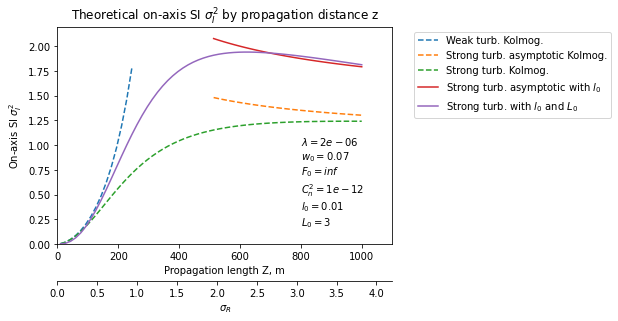

In [22]:
z = np.linspace(10, 1e3, 60)
second_axis_func = lambda x: np.sqrt(get_rytov2(model.Cn2, gaussian_beam.k, x))

# plt.figure(figsize=(12,7))
plt.plot(z[:15], np.exp(get_SI_andrews_weak_kolmogorov(z[:15], model, gaussian_beam)) - 1, ls="--", label="Weak turb. Kolmog.")
plt.plot(z[30:], get_SI_andrews_strong_asymptotic_zeroscale(z[30:], model, gaussian_beam), ls="--", label="Strong turb. asymptotic Kolmog.")
plt.plot(z, get_SI_andrews_strong_zeroscale(z, model, gaussian_beam), ls="--", label="Strong turb. Kolmog.")
plt.plot(z[30:], get_SI_andrews_strong_asymptotic_l0(z[30:], model, gaussian_beam), label=r"Strong turb. asymptotic with $l_0$")
plt.plot(z, get_SI_andrews_strong(z, model, gaussian_beam), label=r"Strong turb. with $l_0$ and $L_0$")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xlabel("Propagation length Z, m")
plt.ylabel("On-axis SI $\sigma_I^2$")
plt.title("Theoretical on-axis SI $\sigma_I^2$ by propagation distance z")

plt.text(z[-1] * 0.8, 0.05, f"""
$\lambda = {gaussian_beam.wvl}$
$w_0 = {gaussian_beam.w0}$
$F_0 = {gaussian_beam.F0}$
$C_n^2 = {model.Cn2}$
$l_0 = {model.l0}$
$L_0 = {model.L0}$
""")

plt.ylim(0, 2.2)
plt.xlim(0,1100)

second_axis = plt.gca().secondary_xaxis(-0.17, functions=(second_axis_func, lambda x: x))
second_axis.set_xlabel("$\sigma_R$");

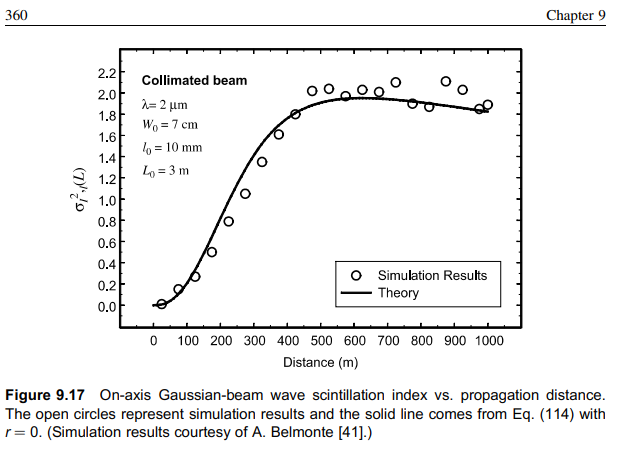